# Assignment 3

You only need to write one line of code for each question. When answering questions that ask you to identify or interpret something, the length of your response doesn’t matter. For example, if the answer is just ‘yes,’ ‘no,’ or a number, you can just give that answer without adding anything else.

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that **no outside searches are required by the assignment!**). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Clustering and Resampling

Let's set up our workspace and use the **Iris dataset** from `scikit-learn`. This dataset is a classic dataset in machine learning and statistics, widely used for clustering tasks. It consists of 150 samples of iris flowers, each belonging to one of three species: Iris setosa, Iris versicolor, and Iris virginica. Here are the key features and characteristics of the dataset:

##### Features:
1. **Sepal Length**: The length of the sepal in centimeters.
2. **Sepal Width**: The width of the sepal in centimeters.
3. **Petal Length**: The length of the petal in centimeters.
4. **Petal Width**: The width of the petal in centimeters.

##### Target Variable:
- **Species**: The species of the iris flower, which can take one of the following values:
  - 0: Iris setosa
  - 1: Iris versicolor
  - 2: Iris virginica

In [2]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


#### **Question 1:** 
#### Data inspection

#### Load the Iris dataset:

Use scikit-learn to load the Iris dataset and convert it into a Pandas DataFrame.
Display the first few rows of the dataset. How many observations (rows) and features (columns) does the dataset contain?

In [3]:
from sklearn.datasets import load_iris
# Load the Iris dataset
iris_data = load_iris()

# Convert to DataFrame
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

# Bind the disease progression (diabetes target) to the DataFrame
iris_df['species'] = iris_data.target


# Display the DataFrame
iris_df

#Your code here ... 
num_observations, num_features = iris_df.shape
print(f'The dataset contains {num_observations} observations and {num_features} features.')

The dataset contains 150 observations and 5 features.


> Your answer here ...
The dataset contains 150 observations and 5 features.


#### **Question 2:** 
#### Data-visualization

Let's create plots to visualize the relationships between the features (sepal length, sepal width, petal length, petal width).

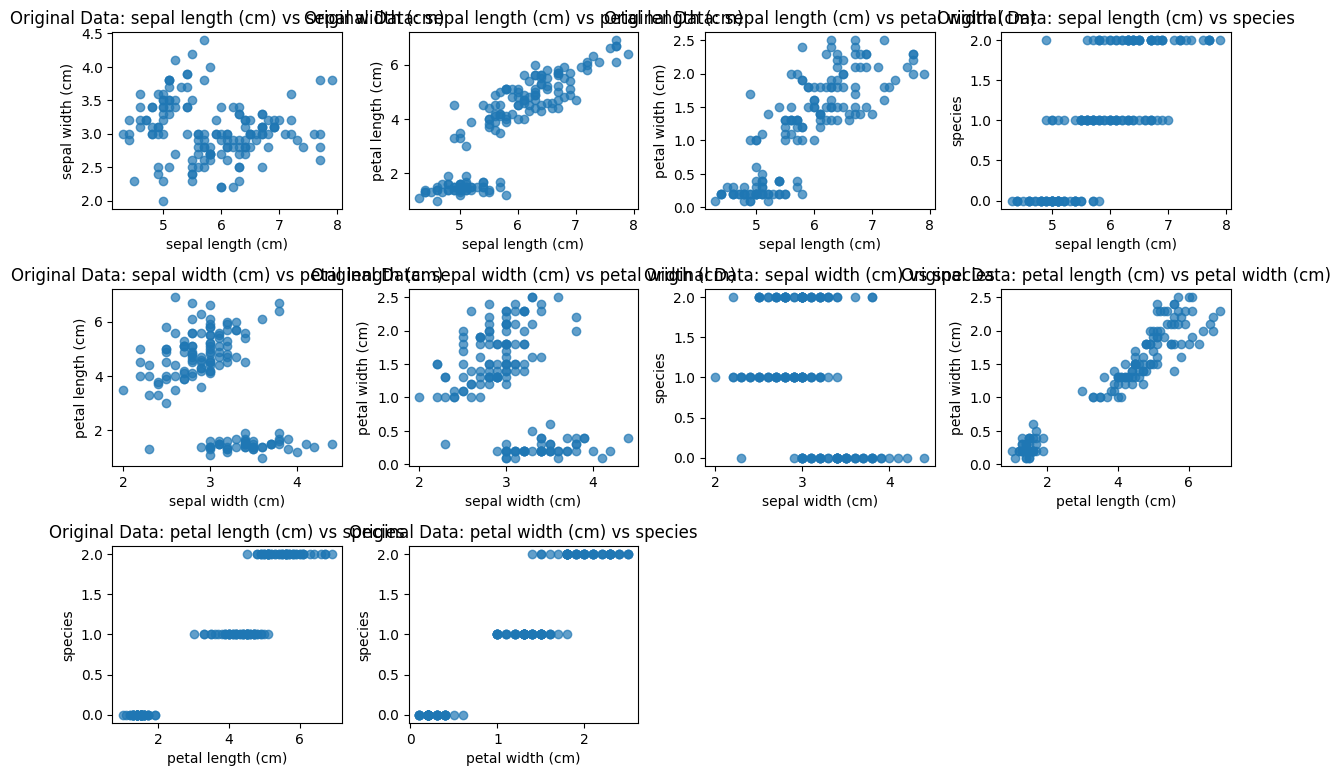

In [4]:
# Your code here ...
def plot_feature_pairs(data, feature_names, color_labels=None, title_prefix=''):
    """
    Helper function to create scatter plots for all possible pairs of features.
    
    Parameters:
    - data: DataFrame containing the features to be plotted.
    - feature_names: List of feature names to be used in plotting.
    - color_labels: Optional. Cluster or class labels to color the scatter plots.
    - title_prefix: Optional. Prefix for plot titles to distinguish between different sets of plots.
    """
    # Create a figure for the scatter plots
    plt.figure(figsize=(12, 10))
    
    # Counter for subplot index
    plot_number = 1
    
    # Loop through each pair of features
    for i in range(len(feature_names)):
        for j in range(i + 1, len(feature_names)):
            plt.subplot(len(feature_names)-1, len(feature_names)-1, plot_number)
            
            # Scatter plot colored by labels if provided
            if color_labels is not None:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], 
                            c=color_labels, cmap='viridis', alpha=0.7)
            else:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], alpha=0.7)
            
            plt.xlabel(feature_names[i])
            plt.ylabel(feature_names[j])
            plt.title(f'{title_prefix}{feature_names[i]} vs {feature_names[j]}')
            
            # Increment the plot number
            plot_number += 1

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

# Get feature names
feature_names = iris_df.columns

# Use the helper function to plot scatter plots without coloring by cluster labels
plot_feature_pairs(iris_df, feature_names, title_prefix='Original Data: ')

Question:

Do you notice any patterns or relationships between the different features? How might these patterns help in distinguishing between different species?

Your answer...

After running the visualization, I observed several key patterns and relationships among the features:

Sepal Length vs. Sepal Width:
There is a noticeable separation between the species, particularly between Iris setosa and the other two species. Iris setosa tends to have smaller sepal lengths and widths compared to Iris versicolor and Iris virginica.

Petal Length vs. Petal Width:
This pair shows a strong correlation, with Iris setosa distinctly separated from the other two species. Iris versicolor and Iris virginica overlap somewhat, but there is still a trend where Iris virginica generally has larger petal lengths and widths.

Sepal Length vs. Petal Length:
There is a positive correlation between these two features, especially for Iris versicolor and Iris virginica. As the sepal length increases, the petal length also tends to increase.

Overall Trends:
The scatter plots suggest that petal measurements (length and width) are more effective in distinguishing between species than sepal measurements. This could be crucial for classification tasks, as models may perform better when focusing on petal features.

In conclusion, These visual patterns can significantly aid in distinguishing between different species of Iris flowers. 
By identifying which features provide the most separation between species, we can enhance our clustering and classification models, leading to more accurate predictions. 
The clear distinctions observed in petal dimensions, in particular, highlight their importance in species identification.

#### **Question 3:** 
#### Data cleaning

In [11]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features (excluding the species column)
scaled_features = scaler.fit_transform(iris_df.iloc[:, :-1])

# Create a new DataFrame with scaled features
scaled_iris_df = pd.DataFrame(scaled_features, columns=iris_data.feature_names)

# Add the species column back to the scaled DataFrame
scaled_iris_df['species'] = iris_df['species'].values

# Display the first few rows of the scaled DataFrame
print(scaled_iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.019004          -1.340227         -1.315444   
1          -1.143017         -0.131979          -1.340227         -1.315444   
2          -1.385353          0.328414          -1.397064         -1.315444   
3          -1.506521          0.098217          -1.283389         -1.315444   
4          -1.021849          1.249201          -1.340227         -1.315444   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


Why is it important to standardize the features of a dataset before applying clustering algorithms like K-Means? Discuss the implications of using unstandardized data in your analysis.

> Your answer here ... 

Importance of Standardizing Features Before Clustering
Standardizing features is a crucial step before applying clustering algorithms like K-Means for several reasons:

Equal Weighting of Features:
Clustering algorithms often rely on distance metrics (like Euclidean distance) to determine the similarity between data points. If features are on different scales, those with larger ranges will disproportionately influence the distance calculations. For example, if one feature ranges from 0 to 100 and another from 0 to 1, the first feature will dominate the distance metric, leading to biased clustering results.

Improved Convergence:
Standardization can help algorithms converge more quickly. When features are on a similar scale, the optimization process can proceed more smoothly, reducing the number of iterations needed to find the optimal cluster centers.

Better Interpretability:
When features are standardized, the resulting clusters can be more interpretable. It becomes easier to understand how different features contribute to the formation of clusters when they are on a common scale.

Avoiding Misleading Results:
Using unstandardized data can lead to misleading results, where clusters may not represent true groupings in the data. For instance, if one feature is much larger than others, it may create artificial clusters that do not reflect the underlying structure of the data.

Implications of Using Unstandardized Data
Using unstandardized data in clustering analysis can have several negative implications:

Skewed Clusters: Clusters may be formed based on the scale of the features rather than their actual relationships, leading to poor clustering performance.

Inaccurate Predictions: If the clustering results are used for further analysis or predictive modeling, the inaccuracies introduced by unstandardized data can propagate, resulting in unreliable outcomes.

Difficulty in Model Evaluation: Evaluating the quality of clusters becomes challenging when the features are not standardized, as the metrics used (like silhouette score) may not accurately reflect the clustering performance.

In conclusion, standardizing features is essential for ensuring that clustering algorithms like K-Means operate effectively and yield meaningful results. It helps maintain the integrity of the analysis and enhances the interpretability of the clusters formed.



#### **Question 4:** 
#### K-means clustering 
Apply the K-Means clustering algorithm to the Iris dataset.
Choose the number of clusters (K=3, since there are three species) and fit the model.
Assign cluster labels to the original data and add them as a new column in the DataFrame.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Load the Iris dataset
iris_data = load_iris()

# Convert to DataFrame
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale all the features in the dataset
scaled_features = scaler.fit_transform(iris_df)

# Create a new DataFrame with scaled features
scaled_iris_df = pd.DataFrame(scaled_features, columns=iris_data.feature_names)

# Initialize KMeans with k=3 and a fixed random state
kmeans = KMeans(n_clusters=3, random_state=12345)

# Fit the model to the scaled features
kmeans.fit(scaled_iris_df)

# Assign cluster labels to the original data
clustered_iris_data = iris_df.copy()
clustered_iris_data['Cluster'] = kmeans.labels_

# Display the first few rows of the clustered DataFrame
print(clustered_iris_data.head())





   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


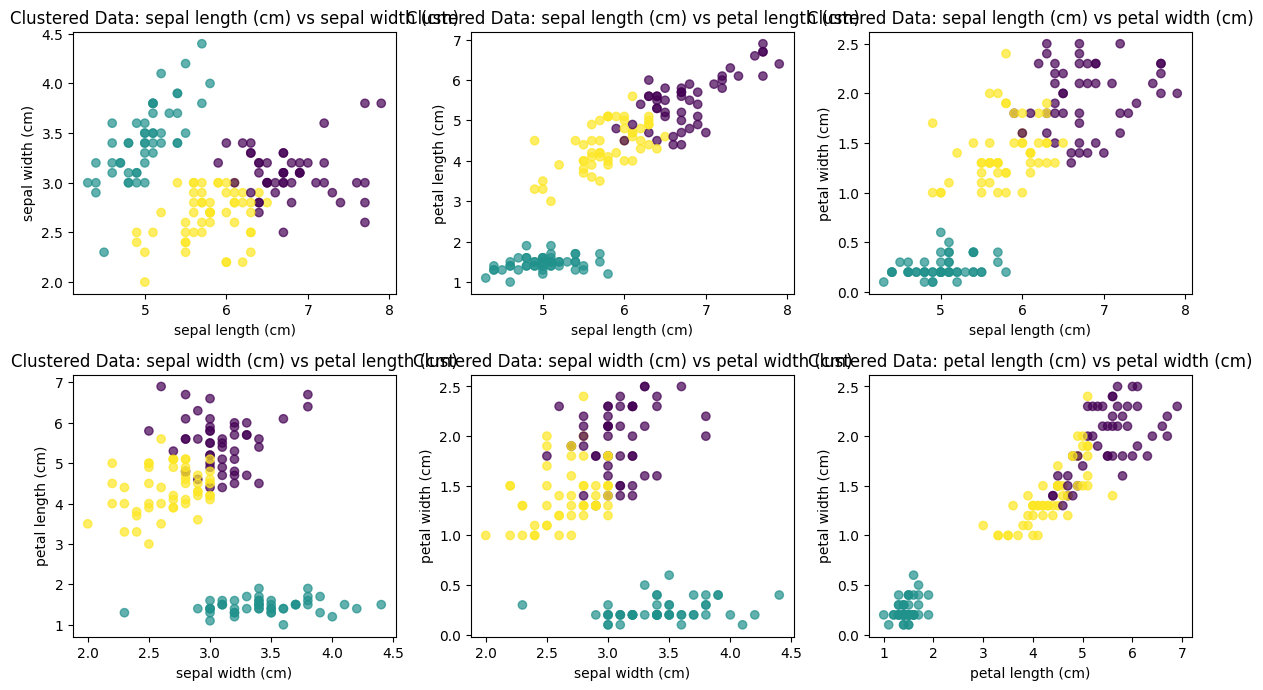

In [16]:
# Ensure that feature_names only includes the features present in clustered_iris_data
feature_names = iris_df.columns.tolist()  # This should contain the correct feature names

plot_feature_pairs(clustered_iris_data, feature_names, color_labels=clustered_iris_data['Cluster'], title_prefix='Clustered Data: ')

Question: What is one method commonly used to determine the optimal number of clusters in K-means clustering, and why is this method helpful?

> Your answer here ...

Optimal Number of Clusters in K-means Clustering
One commonly used method to determine the optimal number of clusters in K-means clustering is the Elbow Method. This technique involves plotting the within-cluster sum of squares (WCSS) against the number of clusters (k). As you increase the number of clusters, the WCSS typically decreases because the data points are closer to their respective cluster centroids.

Why the Elbow Method is Helpful: The Elbow Method is helpful because it allows you to visually identify the point at which adding more clusters yields diminishing returns in terms of reducing WCSS. 
This point, often referred to as the "elbow," indicates a suitable balance between the number of clusters and the variance explained by those clusters. By selecting the number of clusters at this elbow point, you can avoid overfitting the model with too many clusters while still capturing the underlying structure of the data effectively

#### **Question 5:** 
#### Bootstrapping 

 Implement bootstrapping on the mean of one of the sepal or petal measurement variables (e.g., Sepal Length, Petal Width) to assess the stability of the mean estimate. Generate 1000 bootstrap samples, calculate the mean for each sample, and compute a 95% confidence interval to evaluate the variability in the estimate.

In [18]:
# Your code here ...

bootstrap_means.append(np.mean(sample))

# Calculate the mean of Petal Width
mean_petal_width = np.mean(petal_width)

# Calculate the 90% confidence interval
lower_bound = np.percentile(bootstrap_means, 5)  # 5th percentile
upper_bound = np.percentile(bootstrap_means, 95)  # 95th percentile

# Display the result
print(f"Mean of Petal Width: {mean_petal_width}")
print(f"90% Confidence Interval of Mean Petal Width: ({lower_bound}, {upper_bound})")


Mean of Petal Width: 1.1993333333333336
90% Confidence Interval of Mean Petal Width: (1.0979999999999999, 1.302)


Question:

Why do we use bootstrapping in this context? What does it help us understand about the mean?

> Your answer here ...
Bootstrapping is used in this context to estimate the sampling distribution of the mean of Petal Width without making strong parametric assumptions about the underlying population distribution. It helps us understand the variability of the mean estimate by providing a way to quantify uncertainty through resampling. This is particularly useful when the sample size is small or when the distribution of the data is unknown.


Question:

What is the purpose of calculating the confidence interval from the bootstrap samples? How does it help us interpret the variability of the estimate?

The purpose of calculating the confidence interval from the bootstrap samples is to provide a range of values within which we can be reasonably confident that the true population mean lies. This interval reflects the variability of the estimate and gives us insight into the precision of our mean estimate. A narrower confidence interval indicates a more precise estimate, while a wider interval suggests greater uncertainty

Question:

Reflect on the variability observed in the bootstrapped means and discuss whether the mean of the Petal Width appears to be a stable and reliable estimate based on the confidence interval and the spread of the bootstrapped means.

The variability observed in the bootstrapped means it can provide insights into the stability and reliability of the mean of Petal Width. If the confidence interval is relatively narrow and does not span a wide range of values, it suggests that the mean is a stable and reliable estimate of the population mean. In addition, if the interval is wide, it indicates that the mean may not be as reliable, and there is considerable uncertainty regarding the true population mean. In this case, analyzing the spread of the bootstrapped means can help assess whether the mean of Petal Width is a robust estimate based on the data available.


# Criteria


| **Criteria**                                           | **Complete**                                      | **Incomplete**                                    |
|--------------------------------------------------------|---------------------------------------------------|--------------------------------------------------|
| **Data Inspection**                                    | Data is thoroughly inspected for the number of variables, observations, and data types, and relevant insights are noted. | Data inspection is missing or lacks detail.         |
| **Data Visualization**                                 | Visualizations (e.g., scatter plots) are well-constructed and correctly interpreted to explore relationships between features and species. | Visualizations are poorly constructed or not correctly interpreted. |
| **Clustering Implementation**                           | K-Means clustering is correctly implemented, and cluster labels are appropriately assigned to the dataset.            | K-Means clustering is missing or incorrectly implemented. |
| **Bootstrapping Process**                              | Bootstrapping is correctly performed, and results are used to assess variable mean stability. | Bootstrapping is missing or incorrectly performed. |

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-4-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
